# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [292]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/MyDrive/ITC/5toSem/semanaTecAn/"

else:
    # Define path del proyecto
    Ruta            = ""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [293]:
# Import the packages that we will be using
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# Importing data

In [294]:
# Dataset url
url = "datasets/iris.csv"
# Load the dataset from HHDD
df = pd.read_csv(Ruta + url)
# change the name of the columns
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'flower']
# Visualize the dataset
df

,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [295]:
# get a general feel of the data
df

,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


2. Drop rows with any missing values


In [296]:
#drop rows with missing values
df.dropna(inplace=True)
df

,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


3. Encoding the class label categorical column: from string to num


In [297]:
# Encoding the categorical column
df=df.replace({'flower': {'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}})
#Visualize the dataset
df

,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Now the label/category is numeric


4. Discard columns that won't be used


In [298]:
# # Drop out non necesary columns
# dataset.drop(['Sepal_Length', 'Sepal_Width'],axis='columns',inplace=True)
#
# #Visualize the dataset
# dataset


5. Scatter plot of the data

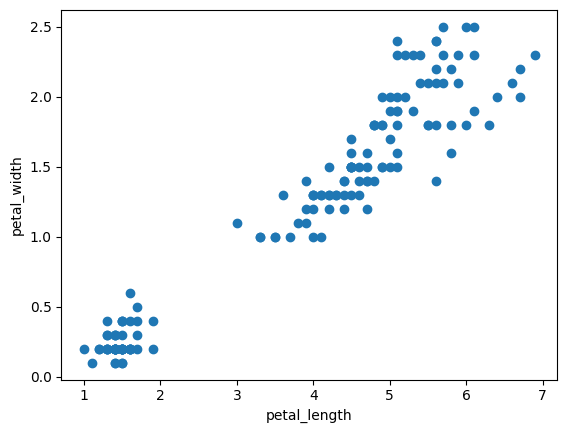

In [299]:
plt.scatter(df.petal_length, df.petal_width)
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

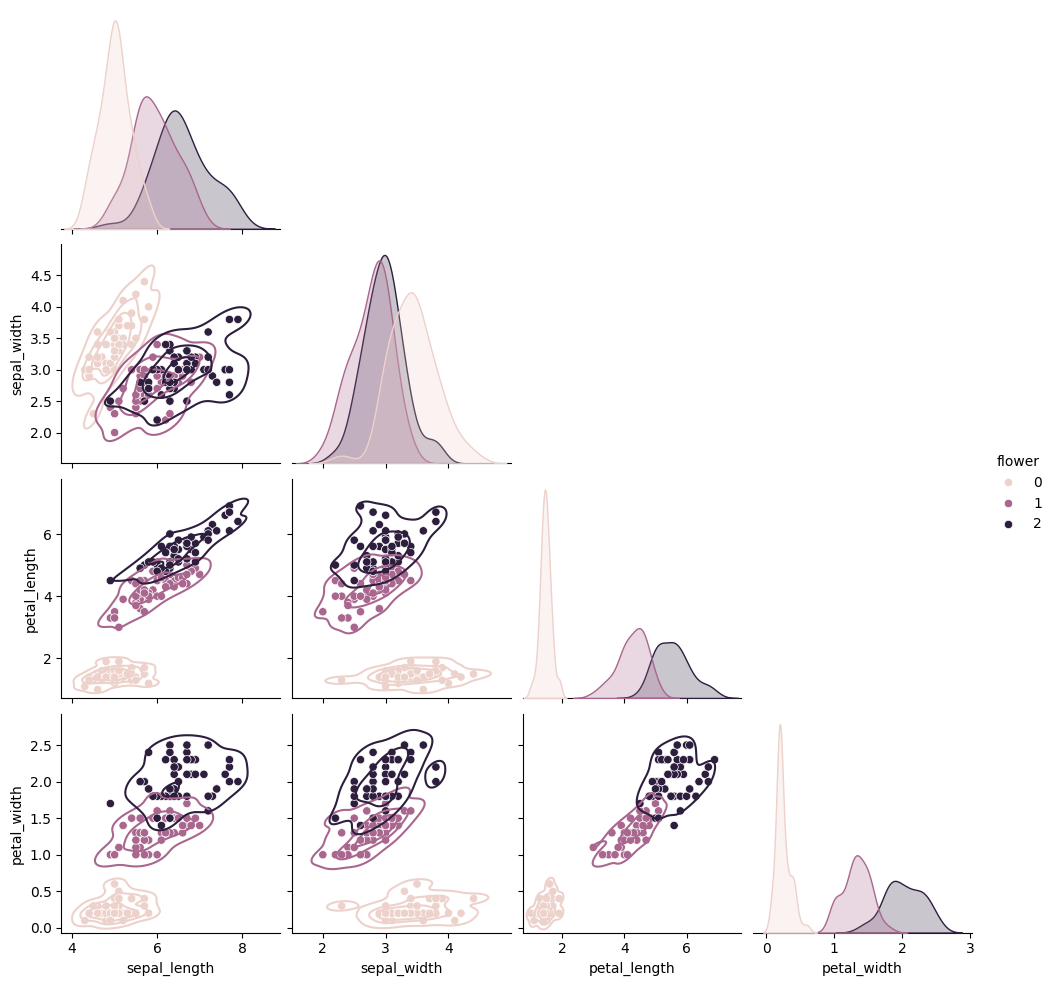

In [300]:
#PAIRPLOT: SCATTER PLOT OF ALL
g = sns.pairplot(df, corner = True, diag_kind = 'kde', hue = 'flower')
g.map_lower(sns.kdeplot, levels = 4, color = '.2')
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

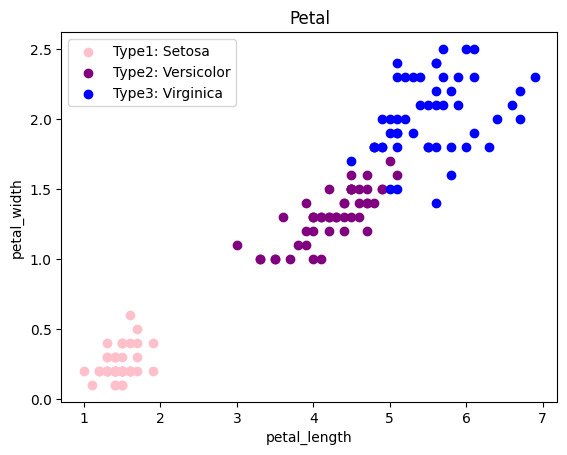

In [301]:
# Get dataframes for each real cluster
df0 = df[df.flower == 0]
df1 = df[df.flower == 1]
df2 = df[df.flower == 2]
plt.scatter(df0.petal_length, df0.petal_width, color = 'pink')
plt.scatter(df1.petal_length, df1.petal_width, color = 'purple')
plt.scatter(df2.petal_length, df2.petal_width, color = 'blue')
plt.legend(['Type1: Setosa', 'Type2: Versicolor', 'Type3: Virginica'])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('Petal')
plt.show()

Recall that for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [302]:
# Import sklearn KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Define number of clusters
k = 3
# Do k-means clustering (assign each point in the dataset to a cluster)
km = KMeans(n_clusters=k, n_init="auto") #modelo ML here
FlowerPredicted = km.fit_predict(df[['sepal_length', 'sepal_width','petal_length', 'petal_width']]) #entrena y predice con todos estos datos
# Print estimated cluster of each point in the dataset
FlowerPredicted

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

In [303]:
# Manual pairing the labels of the real and estimated clusters

In [304]:
# Add cluster information to dataset
df['flower_predictedK3'] = FlowerPredicted
# Show the first few rows to check the cluster assignment
df.head()

,sepal_length,sepal_width,petal_length,petal_width,flower,flower_predictedK3
0,5.1,3.5,1.4,0.2,0,2
1,4.9,3.0,1.4,0.2,0,2
2,4.7,3.2,1.3,0.2,0,2
3,4.6,3.1,1.5,0.2,0,2
4,5.0,3.6,1.4,0.2,0,2


In [305]:
# Display cluster labels
FlowerPredicted = df['flower_predictedK3']
print("Labels of the estimated clusters:", FlowerPredicted.unique())

Labels of the estimated clusters: [2 1 0]


In [306]:
# Get the centroids of the clusters
print("Cluster centroids:\n", km.cluster_centers_)

Cluster centroids:
 [[5.88360656 2.74098361 4.38852459 1.43442623]
 [6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]]


In [307]:
# Sum of squared error (sse) of the final model
sse = km.inertia_
print("Sum of squared error (SSE):", sse)

Sum of squared error (SSE): 78.85566582597727


In [308]:
# The number of iterations required to converge
print("Number of iterations:", km.n_iter_)

Number of iterations: 12


<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters

Plot estimated clusters

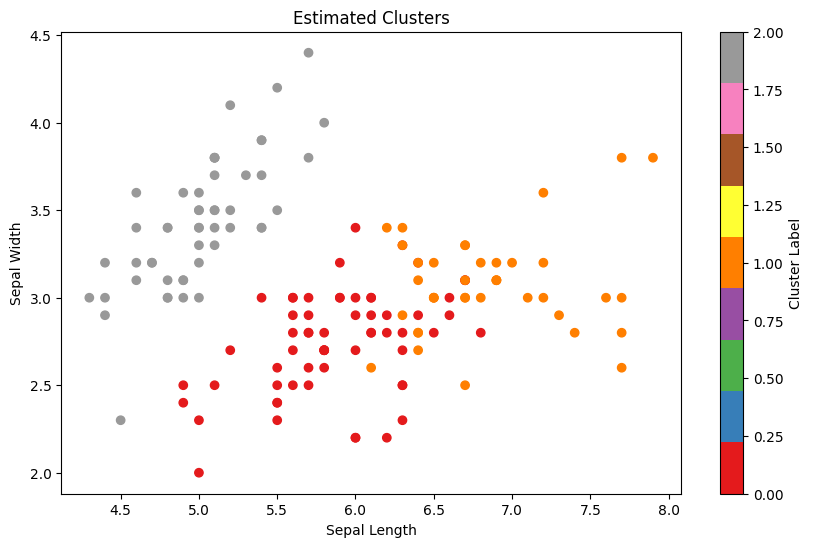

In [309]:
plt.figure(figsize=(10, 6))
plt.scatter(df['sepal_length'], df['sepal_width'], c=df['flower_predictedK3'], cmap='Set1', marker='o')
plt.title('Estimated Clusters')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.colorbar(label='Cluster Label')
plt.show()

## Plot both real and estimated clusters to check for errors

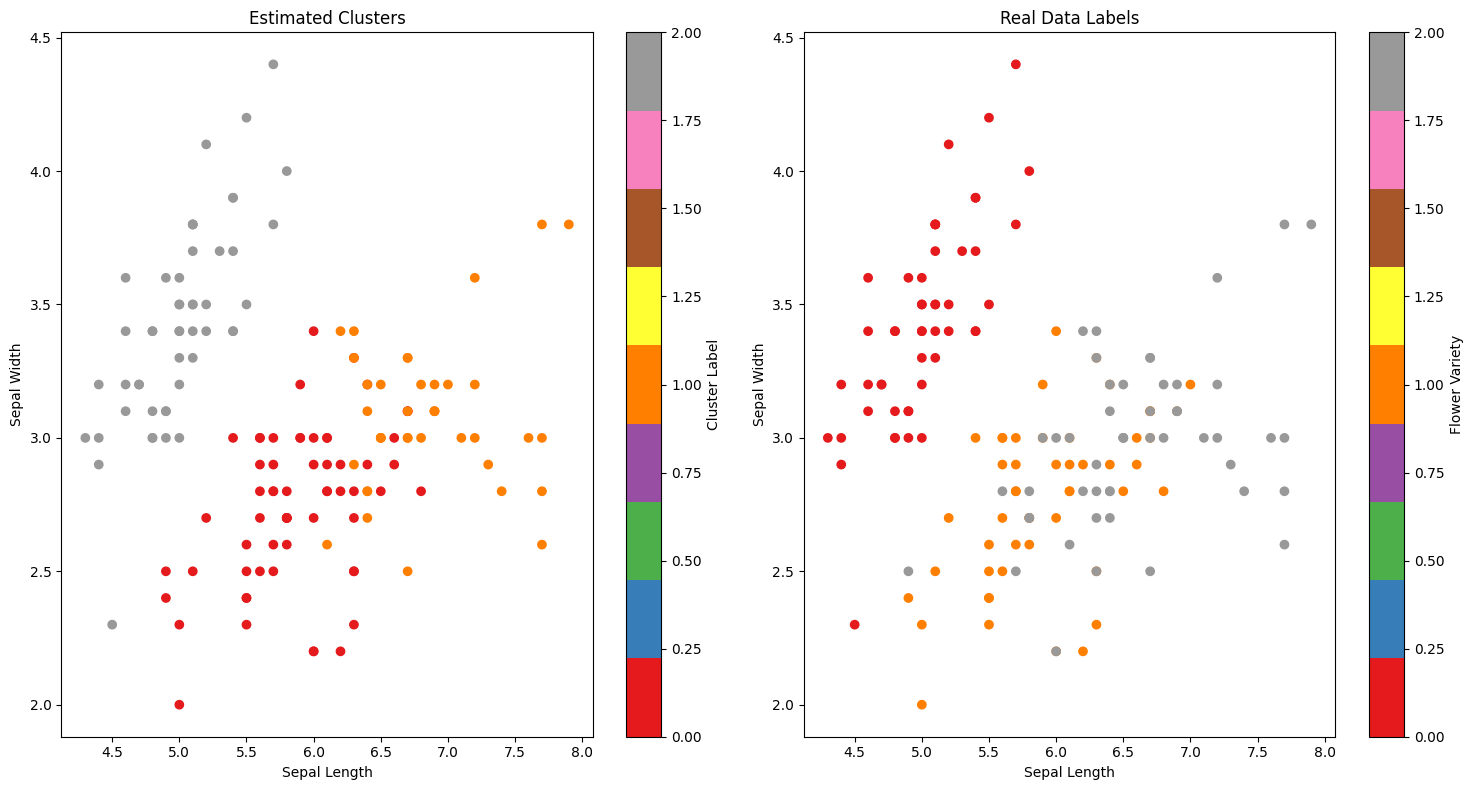

In [310]:
#GRAPH
plt.figure(figsize=(15, 8))

# Plot estimated clusters
plt.subplot(1, 2, 1)
scatter = plt.scatter(df['sepal_length'], df['sepal_width'], c=df['flower_predictedK3'], cmap='Set1', marker='o')
plt.title('Estimated Clusters')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.colorbar(label='Cluster Label')

# Plot real labels
plt.subplot(1, 2, 2)
scatter = plt.scatter(df['sepal_length'], df['sepal_width'], c=df['flower'].astype('category').cat.codes, cmap='Set1', marker='o')
plt.title('Real Data Labels')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.colorbar(label='Flower Variety')

plt.tight_layout()
plt.show()

Choose the k after which the sse is minimally reduced


<span style='color:Blue'> **Important remarks**  </span>

- Note that for K=2 ...
- Note that for K=4 ...
- Note that for K=5 ...



<span style='color:Blue'> **EXAMPLE WITH K=4**  </span>

NUMBER OF CLUSTERS = 4
   sepal_length  sepal_width  petal_length  petal_width  flower  \
0           5.1          3.5           1.4          0.2       0   
1           4.9          3.0           1.4          0.2       0   
2           4.7          3.2           1.3          0.2       0   
3           4.6          3.1           1.5          0.2       0   
4           5.0          3.6           1.4          0.2       0   

   flower_predictedK3  flower_predictedK4  
0                   2                   1  
1                   2                   1  
2                   2                   1  
3                   2                   1  
4                   2                   1  
Labels of the estimated clusters: [1 0 2 3]
Cluster centroids:
 [[6.23658537 2.85853659 4.80731707 1.62195122]
 [5.006      3.428      1.462      0.246     ]
 [5.52962963 2.62222222 3.94074074 1.21851852]
 [6.9125     3.1        5.846875   2.13125   ]]
Sum of squared error (SSE): 57.25600931571815
Number of i

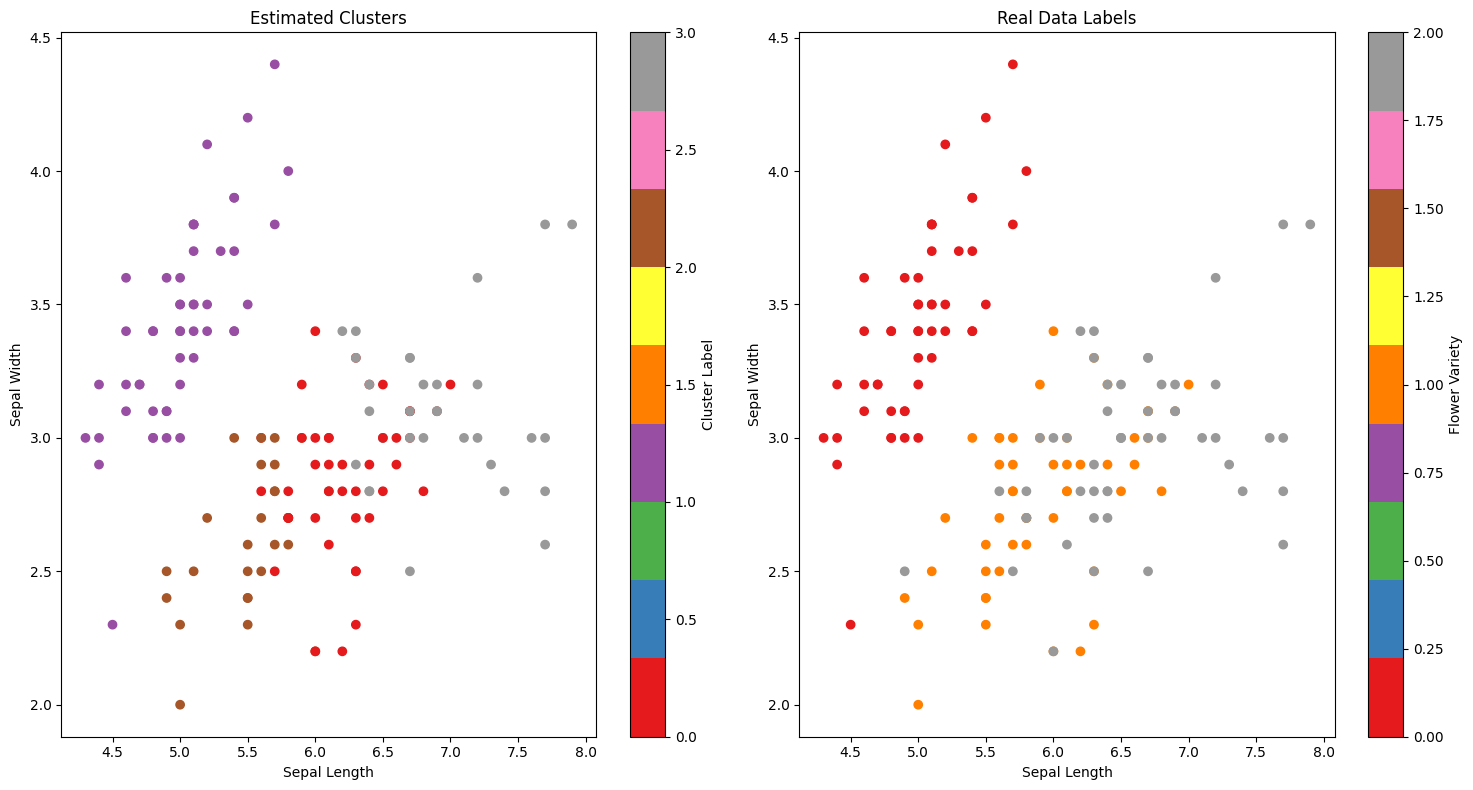

In [311]:
print("NUMBER OF CLUSTERS = 4")
# Define number of clusters
k = 4
# Do k-means clustering (assign each point in the dataset to a cluster)
km = KMeans(n_clusters=k, n_init="auto") #modelo ML here
FlowerPredicted = km.fit_predict(df[['sepal_length', 'sepal_width','petal_length', 'petal_width']]) #entrena y predice con todos estos datos
# Print estimated cluster of each point in the dataset
FlowerPredicted
# Add cluster information to dataset
df['flower_predictedK4'] = FlowerPredicted
# Show the first few rows to check the cluster assignment
print(df.head())
# Display cluster labels
FlowerPredicted = df['flower_predictedK4']
print("Labels of the estimated clusters:", FlowerPredicted.unique())
# Get the centroids of the clusters
print("Cluster centroids:\n", km.cluster_centers_)
# Sum of squared error (sse) of the final model
sse = km.inertia_
print("Sum of squared error (SSE):", sse)
# The number of iterations required to converge
print("Number of iterations:", km.n_iter_)

#GRAPH
plt.figure(figsize=(15, 8))

# Plot estimated clusters
plt.subplot(1, 2, 1)
scatter = plt.scatter(df['sepal_length'], df['sepal_width'], c=df['flower_predictedK4'], cmap='Set1', marker='o')
plt.title('Estimated Clusters')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.colorbar(label='Cluster Label')

# Plot real labels
plt.subplot(1, 2, 2)
scatter = plt.scatter(df['sepal_length'], df['sepal_width'], c=df['flower'].astype('category').cat.codes, cmap='Set1', marker='o')
plt.title('Real Data Labels')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.colorbar(label='Flower Variety')

plt.tight_layout()
plt.show()

<span style='color:Blue'> **EXAMPLE WITH K=5**  </span>

NUMBER OF CLUSTERS = 5
   sepal_length  sepal_width  petal_length  petal_width  flower  \
0           5.1          3.5           1.4          0.2       0   
1           4.9          3.0           1.4          0.2       0   
2           4.7          3.2           1.3          0.2       0   
3           4.6          3.1           1.5          0.2       0   
4           5.0          3.6           1.4          0.2       0   

   flower_predictedK3  flower_predictedK4  flower_predictedK5  
0                   2                   1                   0  
1                   2                   1                   0  
2                   2                   1                   0  
3                   2                   1                   0  
4                   2                   1                   0  
Labels of the estimated clusters: [0 2 3 1 4]
Cluster centroids:
 [[5.006      3.428      1.462      0.246     ]
 [6.52916667 3.05833333 5.50833333 2.1625    ]
 [6.20769231 2.85384615 4.7461

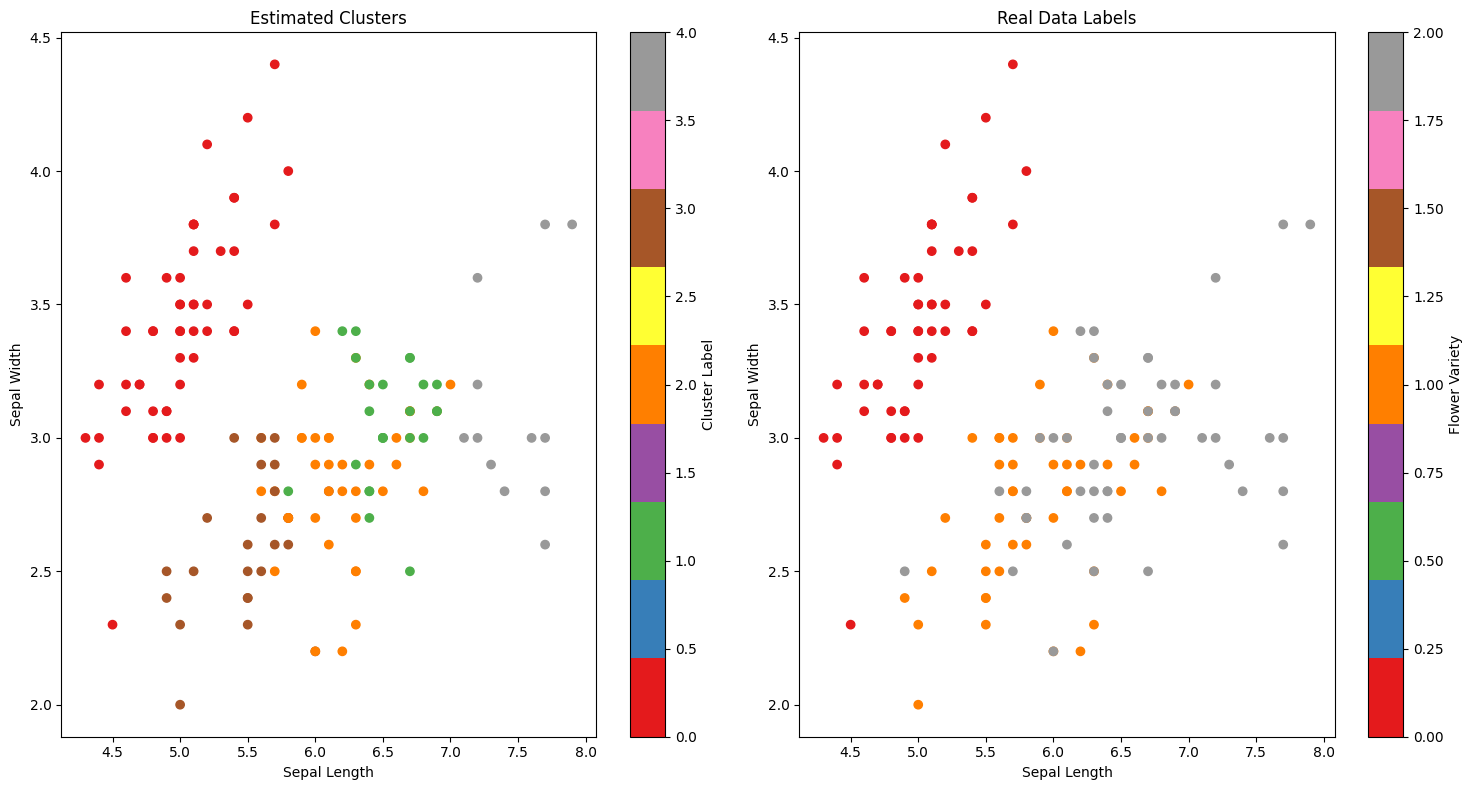

In [312]:
print("NUMBER OF CLUSTERS = 5")
# Define number of clusters
k = 5
# Do k-means clustering (assign each point in the dataset to a cluster)
km = KMeans(n_clusters=k, n_init="auto") #modelo ML here
FlowerPredicted = km.fit_predict(df[['sepal_length', 'sepal_width','petal_length', 'petal_width']]) #entrena y predice con todos estos datos
# Print estimated cluster of each point in the dataset
FlowerPredicted
# Add cluster information to dataset
df['flower_predictedK5'] = FlowerPredicted
# Show the first few rows to check the cluster assignment
print(df.head())
# Display cluster labels
FlowerPredicted = df['flower_predictedK5']
print("Labels of the estimated clusters:", FlowerPredicted.unique())
# Get the centroids of the clusters
print("Cluster centroids:\n", km.cluster_centers_)
# Sum of squared error (sse) of the final model
sse = km.inertia_
print("Sum of squared error (SSE):", sse)
# The number of iterations required to converge
print("Number of iterations:", km.n_iter_)

#GRAPH
plt.figure(figsize=(15, 8))

# Plot estimated clusters
plt.subplot(1, 2, 1)
scatter = plt.scatter(df['sepal_length'], df['sepal_width'], c=df['flower_predictedK5'], cmap='Set1', marker='o')
plt.title('Estimated Clusters')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.colorbar(label='Cluster Label')

# Plot real labels
plt.subplot(1, 2, 2)
scatter = plt.scatter(df['sepal_length'], df['sepal_width'], c=df['flower'].astype('category').cat.codes, cmap='Set1', marker='o')
plt.title('Real Data Labels')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.colorbar(label='Flower Variety')

plt.tight_layout()
plt.show()

<span style='color:Blue'> **EXAMPLE WITH K=2**  </span>

NUMBER OF CLUSTERS = 2
   sepal_length  sepal_width  petal_length  petal_width  flower  \
0           5.1          3.5           1.4          0.2       0   
1           4.9          3.0           1.4          0.2       0   
2           4.7          3.2           1.3          0.2       0   
3           4.6          3.1           1.5          0.2       0   
4           5.0          3.6           1.4          0.2       0   

   flower_predictedK3  flower_predictedK4  flower_predictedK5  \
0                   2                   1                   0   
1                   2                   1                   0   
2                   2                   1                   0   
3                   2                   1                   0   
4                   2                   1                   0   

   flower_predictedK2  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
Labels of the estimated clusters: [0 1]

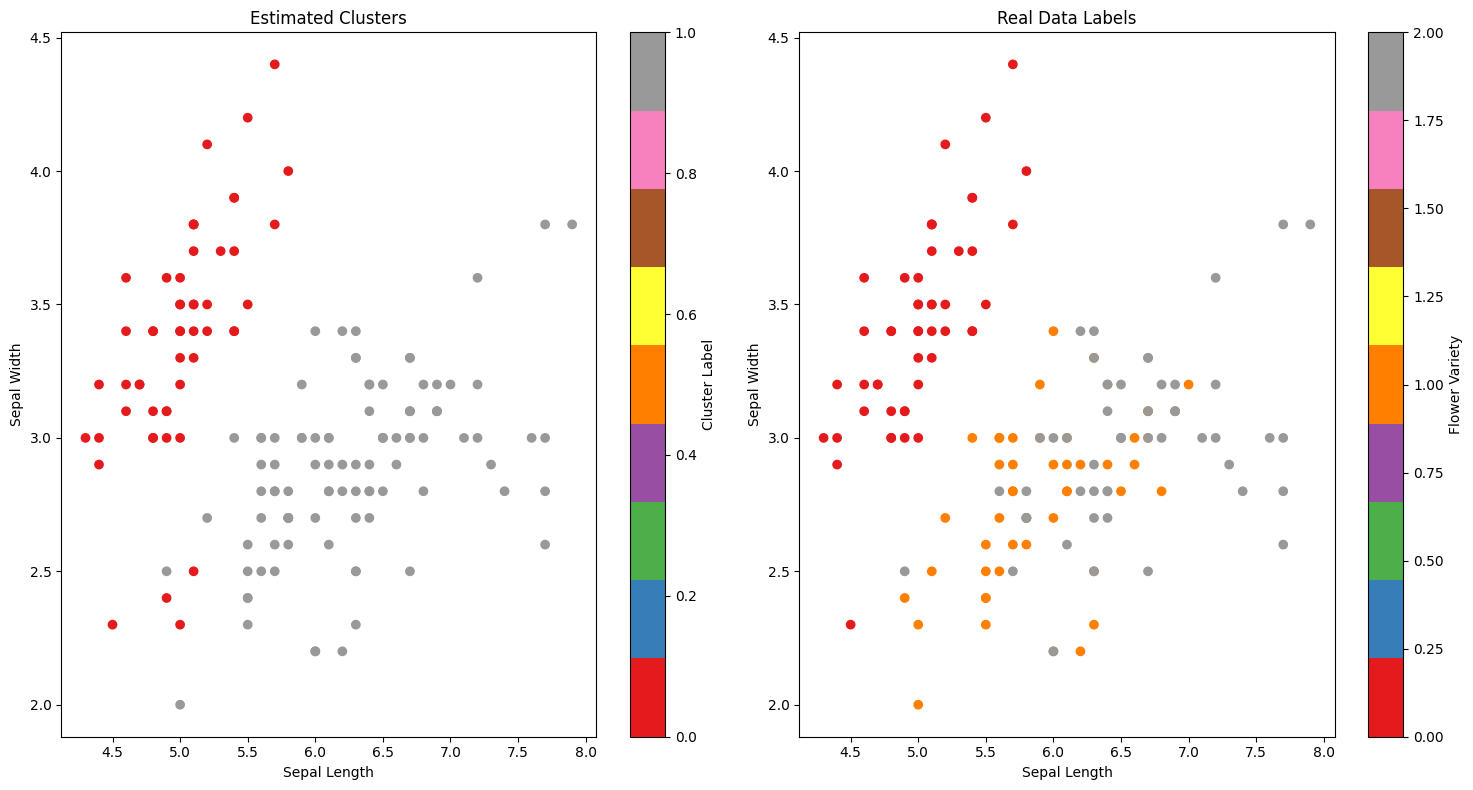

In [313]:
print("NUMBER OF CLUSTERS = 2")
# Define number of clusters
k = 2
# Do k-means clustering (assign each point in the dataset to a cluster)
km = KMeans(n_clusters=k, n_init="auto") #modelo ML here
FlowerPredicted = km.fit_predict(df[['sepal_length', 'sepal_width','petal_length', 'petal_width']]) #entrena y predice con todos estos datos
# Print estimated cluster of each point in the dataset
FlowerPredicted
# Add cluster information to dataset
df['flower_predictedK2'] = FlowerPredicted
# Show the first few rows to check the cluster assignment
print(df.head())
# Display cluster labels
FlowerPredicted = df['flower_predictedK2']
print("Labels of the estimated clusters:", FlowerPredicted.unique())
# Get the centroids of the clusters
print("Cluster centroids:\n", km.cluster_centers_)
# Sum of squared error (sse) of the final model
sse = km.inertia_
print("Sum of squared error (SSE):", sse)
# The number of iterations required to converge
print("Number of iterations:", km.n_iter_)

#GRAPH
plt.figure(figsize=(15, 8))

# Plot estimated clusters
plt.subplot(1, 2, 1)
scatter = plt.scatter(df['sepal_length'], df['sepal_width'], c=df['flower_predictedK2'], cmap='Set1', marker='o')
plt.title('Estimated Clusters')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.colorbar(label='Cluster Label')

# Plot real labels
plt.subplot(1, 2, 2)
scatter = plt.scatter(df['sepal_length'], df['sepal_width'], c=df['flower'].astype('category').cat.codes, cmap='Set1', marker='o')
plt.title('Real Data Labels')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.colorbar(label='Flower Variety')

plt.tight_layout()
plt.show()

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

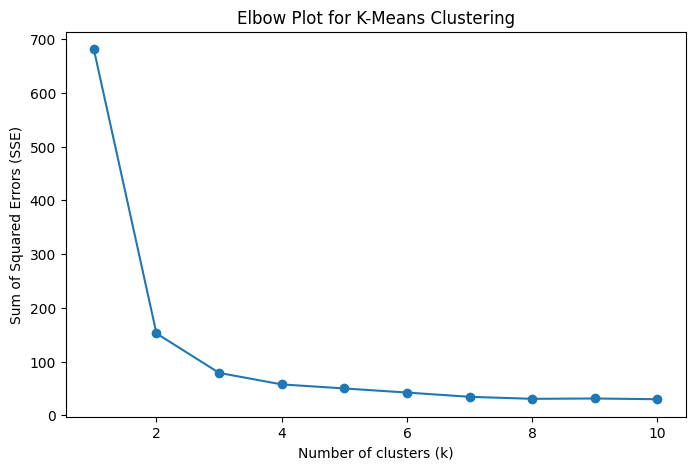

In [314]:
# Intialize a list to hold sum of squared error (sse)
# Initialize a list to hold SSE values
sse_list = []

# Define values of k
k_values = range(1, 11)  # Testing k from 1 to 10

# For each k
# For each k, fit KMeans and calculate SSE
for k in k_values:
    km = KMeans(n_clusters=k, n_init="auto")
    km.fit(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
    sse_list.append(km.inertia_)

# Plot SSE vs. k
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse_list, marker='o')
plt.title('Elbow Plot for K-Means Clustering')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

# Final remarks

- The number of each cluster need to be assigned assigned

- The order of the number in each cluster is random

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k

In [315]:
df

,sepal_length,sepal_width,petal_length,petal_width,flower,flower_predictedK3,flower_predictedK4,flower_predictedK5,flower_predictedK2
0,5.1,3.5,1.4,0.2,0,2,1,0,0
1,4.9,3.0,1.4,0.2,0,2,1,0,0
2,4.7,3.2,1.3,0.2,0,2,1,0,0
3,4.6,3.1,1.5,0.2,0,2,1,0,0
4,5.0,3.6,1.4,0.2,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1,3,1,1
146,6.3,2.5,5.0,1.9,2,0,0,2,1
147,6.5,3.0,5.2,2.0,2,1,0,1,1
148,6.2,3.4,5.4,2.3,2,1,3,1,1


## K-means Clustering Conclusion

In the activity, we applied the K-means clustering algorithm to the Iris dataset, which involves unsupervised learning to categorize data points into clusters based on their features. K-means clusters data by minimizing the variance within each cluster, and the number of clusters (`k`) is a crucial parameter that we need to determine.

When we tested different values of `k`, the results showed the following:

- For `k = 3`: The algorithm identified clusters with centroids at `(5.88, 2.74, 4.39, 1.43)`, `(6.85, 3.08, 5.72, 2.05)`, and `(5.01, 3.43, 1.46, 0.25)`. The sum of squared error (SSE) was 78.86, and it converged in 12 iterations.
- For `k = 4`: The centroids were `(6.24, 2.86, 4.81, 1.62)`, `(5.01, 3.43, 1.46, 0.25)`, `(5.53, 2.62, 3.94, 1.22)`, and `(6.91, 3.10, 5.85, 2.13)` with an SSE of 57.26, converging in just 3 iterations.
- For `k = 5`: The centroids showed more variance, with labels assigned to clusters being `(0, 2, 3, 1, 4)` with an Sum of squared error (SSE) of 46.44618205128204 and 5 iterations.
- For `k = 2` The labels assigned to clusters were `(0, 1)` with an Sum of squared error (SSE) of 152.348 and 3 iterations.


The decrease in SSE as `k` increased indicates that more clusters generally lead to a better fit of the data. However, the Iris dataset is known to have three distinct types of flowers (Setosa, Versicolor, and Virginica). Therefore, despite the decrease in SSE for higher `k`, the optimal `k` for this dataset is 3, which aligns with the true number of categories in the data.

In practice, choosing the number of clusters when the true labels are unknown can be approached by using techniques like the Elbow Method, where the SSE is plotted against different values of `k` to find the "elbow point" where the SSE decrease starts to level off. In the absence of known labels, this approach helps in determining a reasonable `k`. If the true number of clusters is known, as with the Iris dataset, choosing `k` to match this number is ideal.